## EXPERIMENT 1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *


### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

### Load data

In [2]:
# # Get all features from feature lists from magface model
# feature_list_children = '../../data/raw_full/feat_img_children_full.list'
# feature_list_adults = '../../data/raw_full/feat_img_adults_full.list'

# image_names_c, ids_c, num_ids_c, norm_feats_c = load_magface_vectors(feature_list_children)
# image_names_a, ids_a, num_ids_a, norm_feats_a = load_magface_vectors(feature_list_adults)

# # Similarity matrices from magface - all
# sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
# sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)

# # Dataframes with info, removes names not in magface results
# children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv') #erstat med den opdaterede
# children_all = children_all[children_all.image_name.isin(image_names_c)]
# adults_all = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv') #erstat med den opdaterede
# adults_all = adults_all[adults_all.image_name.isin(image_names_a)] # OBS, this operation because some magface images has not been through all adults images.


In [2]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/feat_img_children_full.list'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/feature_vectors_from_rfw_bibel_filtered_image_list.list'


def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat

# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv') #erstat med den opdaterede
children_all = children_all[children_all.image_name.isin(image_names_c)]
adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv') #erstat med den opdaterede
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)] # OBS, this operation because some magface images has not been through all adults images.


/data/raw_full/children_full/Asian_366/Asian_366_5.png
/data/raw_full/children_full/Asian_366/Asian_366_2.png
/data/raw_full/children_full/Asian_366/Asian_366_1.png
/data/raw_full/children_full/Asian_366/Asian_366_4.png
/data/raw_full/children_full/Asian_212/Asian_212_6.png
/data/raw_full/children_full/Asian_212/Asian_212_8.png
/data/raw_full/children_full/Asian_212/Asian_212_5.png
/data/raw_full/children_full/Asian_212/Asian_212_2.png
/data/raw_full/children_full/Asian_212/Asian_212_1.png
/data/raw_full/children_full/Asian_212/Asian_212_10.png
/data/raw_full/children_full/African_322/African_322_24.png
/data/raw_full/children_full/African_322/African_322_85.png
/data/raw_full/children_full/African_322/African_322_88.png
/data/raw_full/children_full/African_322/African_322_54.png
/data/raw_full/children_full/Caucasian_1313/Caucasian_1313_11.png
/data/raw_full/children_full/Caucasian_1313/Caucasian_1313_14.png
/data/raw_full/children_full/Caucasian_1313/Caucasian_1313_5.png
/data/raw_fu

In [4]:
# hvis adults all bliver taget fra Image_pairs_similarityscores_OFIQ_worst_dropped.csv,
# tag og filtrer adults_all = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv') #erstat med den opdaterede
# med de navne der er i Image_pairs_similarityscores_OFIQ_worst_dropped
# filtered_adults_all = pd.read_csv('../../data/image_info_csvs/Image_pairs_similarityscores_OFIQ_worst_dropped.csv')
# mask = adults_all['image_name'].isin(filtered_adults_all['image_name'])

# # Apply the mask to keep only the rows where 'image_name' is present in 'filtered_adults_all['Probe Image']'
# final_adults_all = adults_all[mask]

In [4]:
adults_all

,Unnamed: 0,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup
0,31,African_m.012mmb/m.012mmb_0001.jpg,m.012mmb_0001,m.012mmb,enrolled,African,31,m.012mmb,44,93,95,100,NaN
1,32,African_m.012mmb/m.012mmb_0002.jpg,m.012mmb_0002,m.012mmb,enrolled,African,30,m.012mmb,21,100,98,100,NaN
2,66,African_m.0161fm/m.0161fm_0001.jpg,m.0161fm_0001,m.0161fm,enrolled,African,29,m.0161fm,53,100,96,100,NaN
3,70,African_m.016j55/m.016j55_0002.jpg,m.016j55_0002,m.016j55,enrolled,African,34,m.016j55,16,98,99,100,NaN
4,71,African_m.016j55/m.016j55_0003.jpg,m.016j55_0003,m.016j55,enrolled,African,34,m.016j55,37,98,98,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7605,39330,Indian_m.0s8zt03/m.0s8zt03_0003.jpg,m.0s8zt03_0003,m.0s8zt03,enrolled,Indian,23,m.0s8zt03,71,99,95,100,NaN
7606,39332,Indian_m.0s8zt03/m.0s8zt03_0005.jpg,m.0s8zt03_0005,m.0s8zt03,enrolled,Indian,26,m.0s8zt03,34,98,99,100,NaN
7607,39353,Indian_m.0vshsz9/m.0vshsz9_0001.jpg,m.0vshsz9_0001,m.0vshsz9,enrolled,Indian,34,m.0vshsz9,87,96,100,100,NaN
7608,39354,Indian_m.0vshsz9/m.0vshsz9_0002.jpg,m.0vshsz9_0002,m.0vshsz9,enrolled,Indian,36,m.0vshsz9,81,96,100,100,NaN


In [8]:
her = 0
image_names_a[her], ids_a[her], num_ids_a[her]

('m.048v_w_0003', 'm.048v_w', 0)

### GET METRICS 10 TIMES

In [24]:
random_states = [1,2,3,4,5,6,7,8,9,10]
sim_mat_dict_all_magface_ex1_1 = {}
FNIR_c_list=[]
FNIR_a_list=[]
FPIR_c_list=[]
FPIR_a_list=[]
FPD_list=[]
FND_list=[]
GARBE_list=[]

for random_state_i in random_states:

    ### Load children and adults balanced data ###
    children_balanced_df_i = balance_child_data(children_all, print_stats=False, random_state=random_state_i)
    adults_balanced_df_i = balance_adults_data_enrolled(children_balanced_df_i, adults_all, print_stats=False, random_state=random_state_i)


    ### All reference image names, enrolled and non-enrolled image names - children ###
    c_mates = children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
    enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(enrolled_identity_names_c)].image_name)
    non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
    non_enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
    all_reference_image_names_c = list(children_balanced_df_i.image_name)

    ### All reference image names, enrolled and non-enrolled image names - adults ###
    a_mates = adults_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] > 1].index
    enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(enrolled_identity_names_a)].image_name)
    non_enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] == 1].index
    non_enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_a)].image_name)
    all_reference_image_names_a = list(adults_balanced_df_i.image_name)

    ### Similarity matrices for ids in reference database ###
    indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
    indices_a_all_reference = [image_names_a.index(name) for name in all_reference_image_names_a]

    # Extract corresponding columns from the similarity matrix
    sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]
    sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]

    # Extract corresponding rows from the numerical ids
    num_ids_c_reference = num_ids_c[indices_c_all_reference]
    num_ids_a_reference = num_ids_a[indices_a_all_reference]


    ### Similarity matrices for non-enrolled ids ###
    # Get indices of all feature and numerical id elements that are non-enrolled  ids
    indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
    indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a]


    # Extract corresponding rows from the similarity matrix
    sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
    sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]

    # Extract corresponding rows from the numerical ids
    num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
    num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]


    ### Similarity matrices for enrolled ids ###
    # Get indices of all feature and numerical id elements that are enrolled ids
    indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
    indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a]

    # Extract corresponding rows from the similarity matrix
    sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)] # only enrolled columns and rows
    sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]

    # Extract corresponding rows from the numerical ids
    num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
    num_ids_a_enrolled = num_ids_a[indices_a_enrolled]


    ### DET THINGS ###
    # thold = 0.48
    thold = (np.percentile(sim_mat_c,99)+np.percentile(sim_mat_a,99))/2
    # thold = np.percentile(sim_mat_a,99)

    print(thold,np.percentile(sim_mat_c,99),np.percentile(sim_mat_a,99) )

    ### Evaluation metrics ###
    # FNIR
    FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
    FNIR_a, sim_mat_a_enrolled = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_identity_names_a, num_ids_a_enrolled, ids_a, thold=thold)
    # FPIR
    FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
    FPIR_a = compute_fpir(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=thold)




    # OBS maybe compute Garbe outside funtion to choose a good alpha?
    alpha_garbe = 0.47
    FPD_i, FND_i, GARBE_i = GARBE(FNIR_c, FNIR_a, FPIR_c, FPIR_a, alpha=alpha_garbe)

    FNIR_c_list.append(FNIR_c)
    FNIR_a_list.append(FNIR_a)
    FPIR_c_list.append(FPIR_c)
    FPIR_a_list.append(FPIR_a)
    FPD_list.append(FPD_i)
    FND_list.append(FND_i)
    GARBE_list.append(GARBE_i)

    sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_c_enrolled
    sim_mat_dict_all_magface_ex1_1['sim_mat_a_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_a_enrolled
    sim_mat_dict_all_magface_ex1_1['sim_mat_c_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_c_non_enrolled_0)
    sim_mat_dict_all_magface_ex1_1['sim_mat_a_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_a_non_enrolled_0)


    print("done")

# Create a DataFrame from the lists
data = {'Iteration': random_states,'FNIR_c': FNIR_c_list, 'FNIR_a': FNIR_a_list, "FPIR_c": FPIR_c_list, "FPIR_a": FPIR_a_list, "FPD": FPD_list, "FND": FND_list, "GARBE": GARBE_list, "Threshold": thold}
df_all_results = pd.DataFrame(data)


0.53728187084198 0.5371887683868408 0.53728187084198
FPD result:  0.8204518430439952
FND result:  0.8017479300827967
GARBE result, GARBE close to 1 means more unfair:  0.81053876917456
done
0.53728187084198 0.5371887683868408 0.53728187084198
FPD result:  0.8245192307692307
FND result:  0.7147703013064288
GARBE result, GARBE close to 1 means more unfair:  0.7663522981539457
done
0.53728187084198 0.5371887683868408 0.53728187084198
FPD result:  0.7886977886977887
FND result:  0.7392262150626462
GARBE result, GARBE close to 1 means more unfair:  0.7624778546711632
done
0.53728187084198 0.5371887683868408 0.53728187084198
FPD result:  0.8300492610837439
FND result:  0.744707269250713
GARBE result, GARBE close to 1 means more unfair:  0.7848180054122376
done
0.53728187084198 0.5371887683868408 0.53728187084198
FPD result:  0.8062575210589651
FND result:  0.7860981788306176
GARBE result, GARBE close to 1 means more unfair:  0.795573069677941
done
0.53728187084198 0.5371887683868408 0.537281

In [25]:
df_all_results

,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
0,1,0.346366,0.432014,0.666023,0.811776,0.820452,0.801748,0.810539,0.537282
1,2,0.332416,0.465067,0.666667,0.808552,0.824519,0.714770,0.766352,0.537282
2,3,0.328817,0.444812,0.644578,0.817269,0.788698,0.739226,0.762478,0.537282
3,4,0.347096,0.466084,0.669980,0.807157,0.830049,0.744707,0.784818,0.537282
4,5,0.346789,0.441152,0.650485,0.806796,0.806258,0.786098,0.795573,0.537282
5,6,0.332877,0.464923,0.649951,0.819076,0.793517,0.715983,0.752424,0.537282
6,7,0.330906,0.459268,0.660415,0.800592,0.824908,0.720506,0.769575,0.537282
7,8,0.333943,0.464771,0.666992,0.814453,0.818945,0.718511,0.765715,0.537282
8,9,0.327634,0.417759,0.660612,0.803059,0.822619,0.784266,0.802292,0.537282
9,10,0.364834,0.463293,0.661051,0.821606,0.804584,0.787480,0.795519,0.537282


# ting til udnersøgelse af sim scores og OFIQ

In [9]:
sim_mat_a_enrolled_0_df = pd.DataFrame(sim_mat_a_enrolled_0, columns = enrolled_image_names_a, index=enrolled_image_names_a)

In [10]:
sim_mat_a_enrolled_0_df_backup = sim_mat_a_enrolled_0_df.copy()

In [11]:
import pandas as pd

# Assuming sim_mat_a_enrolled_0_df is your DataFrame
# Extract the identity names from the index and columns
identity_rows = sim_mat_a_enrolled_0_df.index.str.extract(r'(.*?_0{3})')[0]
identity_cols = sim_mat_a_enrolled_0_df.columns.str.extract(r'(.*?_0{3})')[0]

# Map the extracted identities back to the DataFrame's rows and columns
sim_mat_a_enrolled_0_df.index = identity_rows
sim_mat_a_enrolled_0_df.columns = identity_cols


In [12]:
sim_mat_a_enrolled_0_df.head()

,m.016j55_000,m.016j55_000,m.01b_88_000,m.01b_88_000,m.01b_88_000,m.01pss2n_000,m.01pss2n_000,m.01qc8lm_000,m.01qc8lm_000,m.01s1zk_000,...,m.0nbv9kv_000,m.0nbv9kv_000,m.0nbv9kv_000,m.0p7654p_000,m.0p7654p_000,m.0pc4m5n_000,m.0pc4m5n_000,m.0pc4m5n_000,m.0rytb24_000,m.0rytb24_000
0,,,,,,,,,,,,,,,,,,,,,
m.016j55_000,1.000000,0.616536,0.157552,0.168696,0.317209,0.310659,0.251509,0.358188,0.341227,0.378966,...,0.302542,0.351353,0.292388,0.192293,0.149319,0.265169,0.202310,0.213715,0.104451,0.025804
m.016j55_000,0.616536,1.000000,0.167518,0.041814,0.204278,0.396887,0.253548,0.390426,0.249163,0.305638,...,0.213503,0.175990,0.232179,0.242368,0.280079,0.144455,0.146604,0.228398,0.057863,0.076467
m.01b_88_000,0.157552,0.167518,1.000000,0.488978,0.535694,0.281238,0.361666,0.269138,0.264548,0.333587,...,0.262186,0.174042,0.211247,0.149117,0.215233,0.224868,0.182152,0.169486,0.356985,0.310317
m.01b_88_000,0.168696,0.041814,0.488978,1.000000,0.548895,0.181653,0.228064,0.183530,0.308683,0.293961,...,0.166017,0.188463,0.105989,-0.033359,-0.031524,0.154672,0.200599,0.238325,0.272328,0.277486
m.01b_88_000,0.317209,0.204278,0.535694,0.548895,1.000000,0.254557,0.200548,0.210531,0.357772,0.456880,...,0.188790,0.202418,0.095193,0.091674,0.132978,0.271629,0.196654,0.103236,0.231585,0.319745


In [13]:

# Replace values of 1 with NaN for accurate mean calculation
filtered_df = sim_mat_a_enrolled_0_df.replace(1, pd.NA)
filtered_df.head()

,m.016j55_000,m.016j55_000,m.01b_88_000,m.01b_88_000,m.01b_88_000,m.01pss2n_000,m.01pss2n_000,m.01qc8lm_000,m.01qc8lm_000,m.01s1zk_000,...,m.0nbv9kv_000,m.0nbv9kv_000,m.0nbv9kv_000,m.0p7654p_000,m.0p7654p_000,m.0pc4m5n_000,m.0pc4m5n_000,m.0pc4m5n_000,m.0rytb24_000,m.0rytb24_000
0,,,,,,,,,,,,,,,,,,,,,
m.016j55_000,<NA>,0.616536,0.157552,0.168696,0.317209,0.310659,0.251509,0.358188,0.341227,0.378966,...,0.302542,0.351353,0.292388,0.192293,0.149319,0.265169,0.20231,0.213715,0.104451,0.025804
m.016j55_000,0.616536,1.000000,0.167518,0.041814,0.204278,0.396887,0.253548,0.390426,0.249163,0.305638,...,0.213503,0.175990,0.232179,0.242368,0.280079,0.144455,0.146604,0.228398,0.057863,0.076467
m.01b_88_000,0.157552,0.167518,1.000000,0.488978,0.535694,0.281238,0.361666,0.269138,0.264548,0.333587,...,0.262186,0.174042,0.211247,0.149117,0.215233,0.224868,0.182152,0.169486,0.356985,0.310317
m.01b_88_000,0.168696,0.041814,0.488978,1.000000,0.548895,0.181653,0.228064,0.183530,0.308683,0.293961,...,0.166017,0.188463,0.105989,-0.033359,-0.031524,0.154672,0.200599,0.238325,0.272328,0.277486
m.01b_88_000,0.317209,0.204278,0.535694,0.548895,1.000000,0.254557,0.200548,0.210531,0.357772,0.456880,...,0.188790,0.202418,0.095193,0.091674,0.132978,0.271629,0.196654,0.103236,0.231585,0.319745


In [14]:
# unique column names
uniq_names = np.unique(identity_cols)

In [15]:
# take out the subset of the df

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# for j in range(1,100):
#     print(j)
#     udtræk = sim_mat_a_enrolled_0_df.loc[uniq_names[j], uniq_names[j]]
#     print(udtræk)

In [16]:
j=8
udtræk = sim_mat_a_enrolled_0_df.loc[uniq_names[j], uniq_names[j]]
print(udtræk)

0              m.01hlvhq_000  m.01hlvhq_000
0                                          
m.01hlvhq_000       1.000000       0.360184
m.01hlvhq_000       0.360184       1.000000


In [17]:
udtræk = sim_mat_a_enrolled_0_df.loc['m.0126y2_000', 'm.0126y2_000']
udtræk

KeyError: 'm.0126y2_000'

: 

In [ ]:
# show top three
top3_val = sim_mat_a_enrolled_0_df_backup['m.01bsgq_0001'].nlargest(4)
top3_val

## Load OFIQ

In [ ]:
df_a_ofiq = pd.read_csv("/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data/OFIQ_results/table_adults_all_in_one.csv", sep=";")


def extract_identifier(filepath):
    filename = filepath.split('/')[-1]
    parts = filename.split('.')
    if parts[-2].isdigit():
        identifier = '.'.join(parts[-3:-1])
    else:
        identifier = '.'.join(parts[:-1])  # Join everything except the extension
    return identifier

df_a_ofiq['Identityname'] = df_a_ofiq['Filename'].apply(extract_identifier)
df_a_ofiq['Identityname'] = df_a_ofiq['Identityname'].str[:-5]


In [ ]:

# Group by the new indices and columns, and then calculate the mean
grouped_by_rows = filtered_df.groupby(filtered_df.index).mean().mean(axis=1)
grouped_by_cols = filtered_df.groupby(filtered_df.columns, axis=1).mean().mean()

# Combine the means from rows and columns
final_mean_scores = (grouped_by_rows + grouped_by_cols)

print(final_mean_scores)


In [ ]:
df_all_results

In [ ]:
print(sim_mat_a_enrolled_0, sim_mat_a_enrolled)

In [ ]:
print(sim_mat_a_enrolled_0.shape, sim_mat_a_enrolled.shape)

#### Check enrolled and non-enrolled similarity distributions

# From DET utils - check import

In [19]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [20]:
mated_scores1 = sim_mat_a_enrolled
nonmated_scores1 = remove_ones(sim_mat_a_non_enrolled_0)
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,5532.000000,3.449771e+06
1,Minimum,0.137445,-2.787891e-01
2,Maximum,0.969252,7.655576e-01
3,Mean,0.579526,2.477969e-01
4,St. Dev.,0.107281,1.151478e-01
5,Skewness,-0.167840,6.039016e-02
6,Ex. Kurtosis,0.869634,-3.949489e-02


In [21]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [22]:
def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None):
    def normalise_scores(distribution):
        return np.ones_like(distribution) / len(distribution)
    plt.figure(figsize=figure_size)
    if normalise:
        plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='red', alpha=0.5, label=mated_label)
        plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='green', alpha=0.5, label=nonmated_label)
        xlabel = "Probability Density"
    else:
        plt.hist(mated_scores, bins=50, color='red', alpha=0.5, label=mated_label)
        plt.hist(nonmated_scores, bins=30, color='green', alpha=0.5, label=nonmated_label)
        xlabel = "Count"
    plt.xlabel("Comparison Score", size=label_fontsize)
    plt.ylabel(xlabel, size=label_fontsize)
    plt.grid(True)
    plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)

    if savename is not None:
        plt.savefig(savename, bbox_inches="tight")
        plt.cla()
        plt.clf()
        plt.close()
    else:
        plt.show()

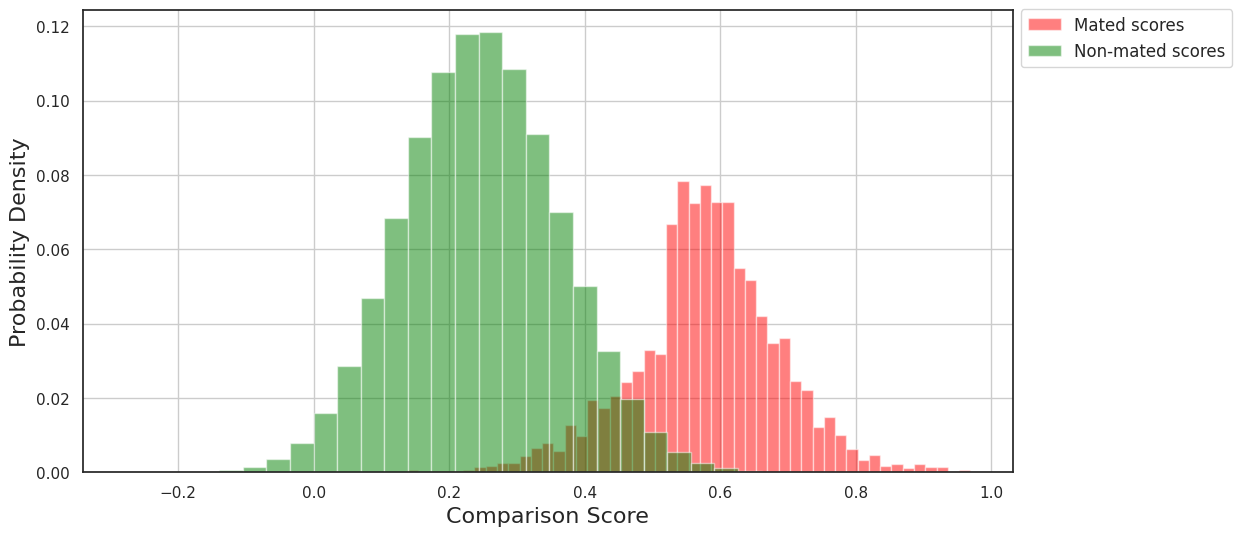

In [23]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True)


#### Canonical/Non-canonical

In [ ]:
df_canonical = pd.read_csv("../../data/OFIQ_results/canonical_children_final.csv", sep=";")

In [ ]:
image_names_can, ids_can, num_ids_can, norm_feats_can = load_magface_vectors(feature_list_children, canonical=True, df_c_can=df_canonical)
# Similarity matrices from magface - canonical
sim_mat_canonical = np.dot(norm_feats_can, norm_feats_can.T)

In [ ]:
random_states = [3]#[1,2,3,4,5,6,7,8,9,10]
sim_mat_dict_all_magface_ex1_2 = {}
FNIR_c_list=[]
FNIR_can_list=[]
FPIR_c_list=[]
FPIR_can_list=[]


for random_state_i in random_states:

    ### Load children and canonical balanced data ###
    children_balanced_df_i = balance_child_data(children_all, print_stats=False, random_state=random_state_i)
    canonical_names = list(df_canonical.Filename.apply(lambda x: x[:-4]))
    canonical_children_balanced_df_i = children_balanced_df_i[children_balanced_df_i.image_name.isin(canonical_names)]

    ### All reference image names, enrolled and non-enrolled image names - children ###
    c_mates = children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
    enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(enrolled_identity_names_c)].image_name)
    non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
    non_enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
    all_reference_image_names_c = list(children_balanced_df_i.image_name)


    ### All reference image names, enrolled and non-enrolled image names - canonical ###
    can_mates = canonical_children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_identity_names_can = can_mates[can_mates[('identity_name', 'count')] > 1].index
    enrolled_image_names_can = list(canonical_children_balanced_df_i[canonical_children_balanced_df_i["identity_name"].isin(enrolled_identity_names_can)].image_name)
    non_enrolled_identity_names_can = can_mates[can_mates[('identity_name', 'count')] == 1].index
    non_enrolled_image_names_can = list(canonical_children_balanced_df_i[canonical_children_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_can)].image_name)
    all_reference_image_names_can = list(canonical_children_balanced_df_i.image_name)


    ### Similarity matrices for ids in reference database ###
    indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
    indices_can_all_reference = [image_names_can.index(name) for name in all_reference_image_names_can]

    # Extract corresponding columns from the similarity matrix
    sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]
    sim_mat_can_reference_cols = sim_mat_canonical[:, indices_can_all_reference]

    # Extract corresponding rows from the numerical ids
    num_ids_c_reference = num_ids_c[indices_c_all_reference]
    num_ids_can_reference = num_ids_can[indices_can_all_reference]


    ### Similarity matrices for non-enrolled ids ###
    # Get indices of all feature and numerical id elements that are non-enrolled  ids
    indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
    indices_can_non_enrolled = [image_names_can.index(name) for name in non_enrolled_image_names_can]

    # Extract corresponding rows from the similarity matrix
    sim_mat_c_non_enrolled = sim_mat_c_reference_cols[indices_c_non_enrolled]
    sim_mat_can_non_enrolled = sim_mat_can_reference_cols[indices_can_non_enrolled]

    # Extract corresponding rows from the numerical ids
    num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
    num_ids_can_non_enrolled = num_ids_can[indices_can_non_enrolled]

    ### Similarity matrices for enrolled ids ###
    # Get indices of all feature and numerical id elements that are enrolled ids
    indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
    indices_can_enrolled = [image_names_can.index(name) for name in enrolled_image_names_can]

    # Extract corresponding rows from the similarity matrix
    sim_mat_c_enrolled = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)] # only enrolled columns and rows
    sim_mat_can_enrolled = sim_mat_a[np.ix_(indices_can_enrolled, indices_can_enrolled)]

    # Extract corresponding rows from the numerical ids
    num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
    num_ids_can_enrolled = num_ids_can[indices_can_enrolled]


    ### DET THINGS ###
    thold = 0.43

    ### Evaluation metrics ###
    # FNIR
    FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
    FNIR_can, sim_mat_can_enrolled = compute_fnir(sim_mat_can_enrolled, sim_mat_canonical, enrolled_identity_names_can, num_ids_can_enrolled, ids_can, thold=thold)
    # FPIR
    FPIR_c = compute_fpir(sim_mat_c_non_enrolled, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
    FPIR_can = compute_fpir(sim_mat_can_non_enrolled, num_ids_can_non_enrolled, num_ids_can_reference, thold=thold)


    FNIR_c_list.append(FNIR_c)
    FNIR_can_list.append(FNIR_can)
    FPIR_c_list.append(FPIR_c)
    FPIR_can_list.append(FPIR_can)

    sim_mat_dict_all_magface_ex1_2['sim_mat_c_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_c_enrolled
    sim_mat_dict_all_magface_ex1_2['sim_mat_can_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_can_enrolled
    sim_mat_dict_all_magface_ex1_2['sim_mat_c_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_c_non_enrolled)
    sim_mat_dict_all_magface_ex1_2['sim_mat_can_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_can_non_enrolled)


    print("done")

# Create a DataFrame from the lists
data_can = {'Iteration': random_states,'FNIR_c': FNIR_c_list, 'FNIR_can': FNIR_can_list, "FPIR_c": FPIR_c_list, "FPIR_can": FPIR_can_list, "Threshold": thold}
df_can_results = pd.DataFrame(data_can)


In [ ]:
df_can_results